<a href="https://colab.research.google.com/github/Vicky-0222/NLP/blob/master/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решение задач Классификация Кластеризация Генерация

### Collect data

Установка и импорт необходимых библиотек

In [3]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 55.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import pymorphy3
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [13]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Загрузка данных

In [81]:
df = pd.read_csv('/content/movie.csv')

In [82]:
texts = df['overview']
categories = df['name']

### Prepare data

Токенизация и лемматизация

In [32]:
morph = pymorphy3.MorphAnalyzer()

def preprocessing(text):
    # токенизация
    tokens = word_tokenize(text.lower())
    # лемматизация
    lemmatized_tokens = [
        morph.parse(token)[0].normal_form
        for token in tokens]

    return ''.join(lemmatized_tokens)

In [83]:
preprocessed_texts = texts.apply(preprocessing)
print(preprocessed_texts)

0       firemenbrothersbrianandstephenmccaffreybattlee...
1       factoryworkerdougquaidtakesavirtualmind-tripva...
2       milan,italy,1967.santorusso,aboyofcalabrianori...
3       zedisanamericanvault-crackerwhotravelstoparist...
4       aformermarineconfrontscorruptioninasmalltownwh...
                              ...                        
2995    intheruinsofpost-wwiiberlin,atwelve-year-oldbo...
2996    ayoungmanisafraidofaskingforsextipstohiscousin...
2997    inthisfeaturefilmbasedonthehitanimatedseries,t...
2998    anunsuspecting,disenchantedmanfindshimselfwork...
2999    alex,animmigrantfromukrainecomestocanadaandbec...
Name: overview, Length: 3000, dtype: object


Визуализация

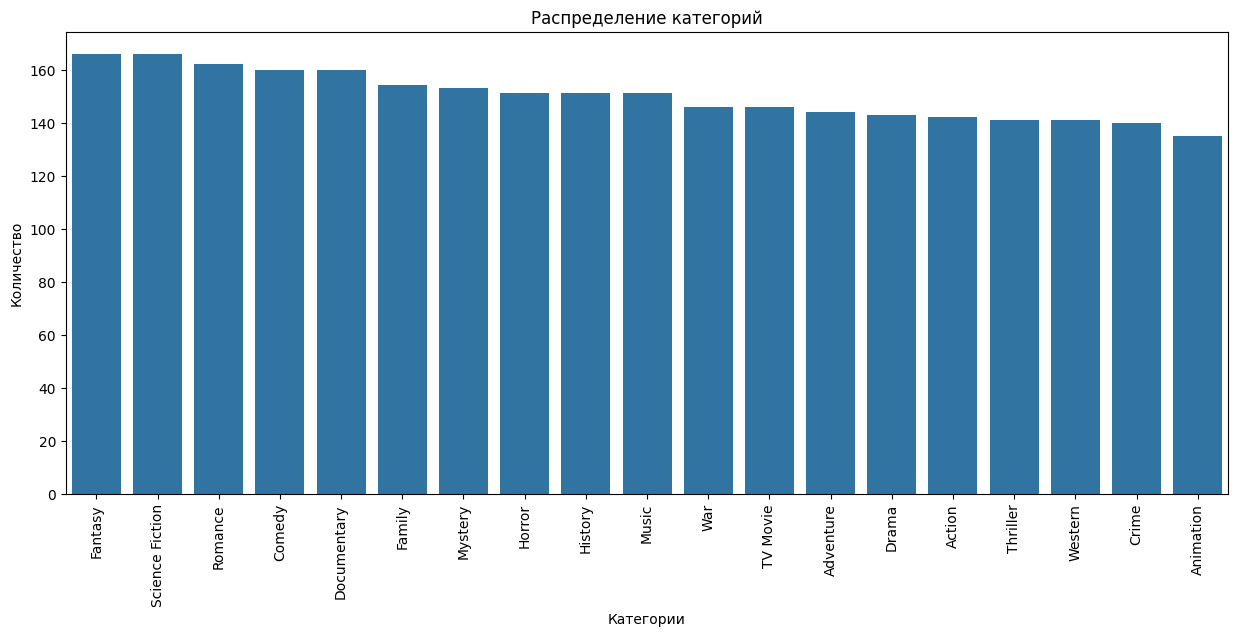

In [89]:
plt.figure(figsize=(15, 6))
sns.countplot(x='name', data=df, order=categories.value_counts().index)
plt.title('Распределение категорий')
plt.xlabel('Категории')
plt.xticks(rotation=90)
plt.ylabel('Количество')
plt.show()

Векторизация TFIDF